In [3]:
# from utils import *
from fastai2.vision.all import *
from nbdev.showdoc import *
from ipywidgets import widgets
from pandas.api.types import CategoricalDtype

import matplotlib as mpl
# mpl.rcParams['figure.dpi']= 200
mpl.rcParams['savefig.dpi']= 200
mpl.rcParams['font.size']=12

set_seed(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
pd.set_option('display.max_columns',999)
np.set_printoptions(linewidth=200)
torch.set_printoptions(linewidth=200)

from fastai2.vision.widgets import *

In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
path = Path('../../other-chess-data/bing-search/')
fns = get_image_files(path)  # works recursively, to each subfolder

failed = verify_images(fns)

In [10]:
failed.map(Path.unlink)

(#6) [None,None,None,None,None,None]

In [11]:
pieces = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.3, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [12]:
dls = pieces.dataloaders(path)

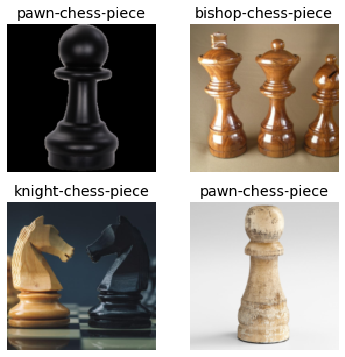

In [14]:
dls.valid.show_batch(max_n=4)

In [15]:
pieces = pieces.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = pieces.dataloaders(path)

In [16]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.678026,1.363557,0.446970,00:18


epoch,train_loss,valid_loss,error_rate,time
0,1.159779,0.813193,0.310606,00:05
1,1.015179,0.563466,0.174242,00:05
2,0.844813,0.450857,0.159091,00:05
3,0.731477,0.375436,0.136364,00:04


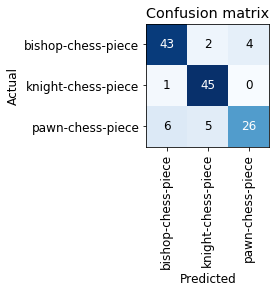

In [17]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

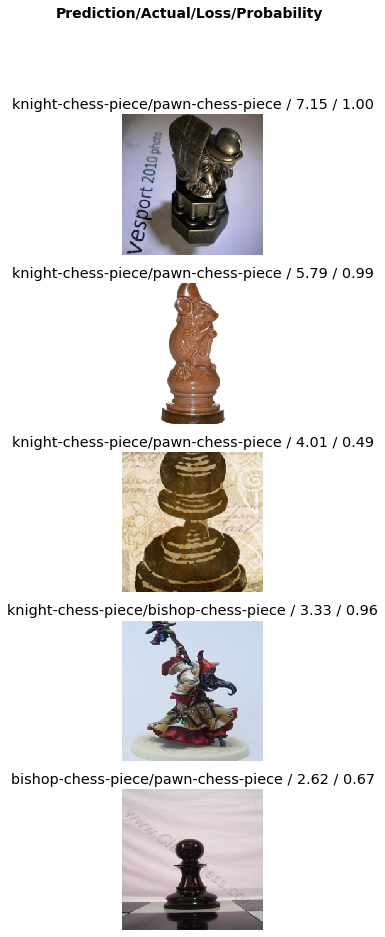

In [22]:
interp.plot_top_losses(5, nrows=5)

In [24]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [29]:
learn.export('models/chess1.pkl')

In [31]:
!ls models

chess1.pkl
